In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_excel('Downloads\EastWestAirlines.xlsx', sheet_name='data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>],
       [<AxesSubplot:title={'center':'cc1_miles'}>,
        <AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>],
       [<AxesSubplot:title={'center':'Flight_trans_12'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award?'}>]], dtype=object)

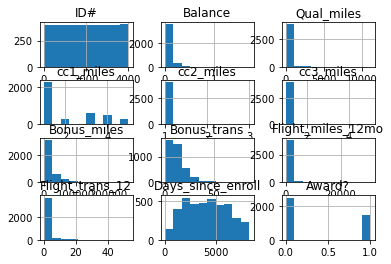

In [5]:
df.hist()

In [6]:
def norm_func(i):
    x=(i-i.min()/i.std())
    return (x)

In [7]:
df_norm=norm_func(df.iloc[:,1:])

In [8]:
type(df_norm)

pandas.core.frame.DataFrame

In [9]:
from scipy.cluster.hierarchy import linkage

In [10]:
help(linkage)
z=linkage(df_norm,method="complete",metric="euclidean")

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [22.5, 22.5, 50.0, 50.0],
  [5.0, 5.0, 36.25, 36.25],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [106.25, 106.25, 140.0, 140.0],
  [70.0, 70.0, 123.125, 123.125],
  [20.625, 20.625, 96.5625, 96.5625],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [212.5, 212.5, 242.5, 242.5],
  [173.75, 173.75, 227.5, 227.5],
  [155.0, 155.0, 200.625, 200.625],
  [58.59375, 58.59375, 177.8125, 177.8125],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],


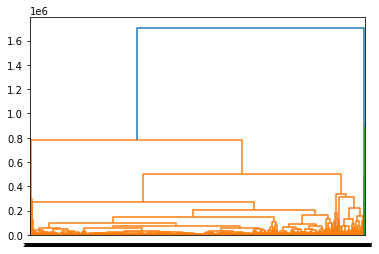

In [11]:
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=6.,)

In [12]:
h_labels=AgglomerativeClustering(n_clusters=14,affinity="euclidean",linkage="complete").fit(df_norm)

In [13]:
clusters_labels=pd.Series(h_labels.labels_)

In [14]:
df["Clusters"]=clusters_labels
df_final=df.iloc[:,[0,12,1,2,3,4,5,6,7,8,9,10,11]]
df_final.iloc[:,1:].groupby(df.Clusters).mean()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,0.0,5.289910e+05,832.909091,3.636364,1.000000,1.000000,68646.727273,21.272727,1870.363636,5.090909,6662.181818,0.818182
1,1.0,1.191844e+05,178.663220,3.004431,1.008863,1.039882,31303.011817,16.199409,721.580502,2.057607,4672.971935,0.428360
2,2.0,1.184935e+06,1910.000000,3.500000,1.000000,1.000000,44595.500000,22.750000,2237.500000,8.500000,7956.250000,0.750000
3,3.0,6.935972e+05,311.066667,3.333333,1.000000,1.200000,42869.000000,23.400000,1721.333333,6.400000,6040.466667,0.800000
4,4.0,1.953142e+05,412.196891,2.751295,1.010363,1.000000,30538.212435,17.652850,1066.844560,3.031088,5032.113990,0.461140
5,5.0,3.306219e+04,104.062543,1.723513,1.016063,1.005126,10899.062543,9.616883,297.614149,0.901914,3826.945318,0.330144
6,6.0,4.042209e+05,425.254902,2.882353,1.058824,1.000000,42929.392157,18.078431,1494.607843,4.745098,6007.705882,0.745098
7,7.0,3.223280e+05,0.000000,5.000000,1.000000,1.000000,247157.000000,40.500000,4696.500000,9.500000,6790.000000,1.000000
8,8.0,2.769528e+05,246.709091,3.027273,1.000000,1.000000,36276.690909,18.236364,1104.327273,3.481818,5176.300000,0.563636


In [15]:
df_final.head()

,ID#,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,5,28143,0,1,1,1,174,1,0,0,7000,0
1,2,5,19244,0,1,1,1,215,2,0,0,6968,0
2,3,5,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,5,14776,0,1,1,1,500,1,0,0,6952,0
4,5,1,97752,0,4,1,1,43300,26,2077,4,6935,1


In [16]:
df_final.to_csv("Flights_H.csv")

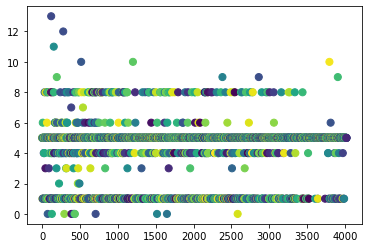

In [17]:
N=3999
colors = np.random.rand(N)
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=colors, s=50, cmap='viridis');